## EDA- USED CARS SOLD UK - pratice

### Contexto 
Discount Motors es un concesionario de coches usados en el Reino Unido. Su objetivo es ser líder en el sector de los coches usados, vendiendo a clientes que buscan las últimas y mejores prestaciones sin el precio de un coche nuevo. El gobierno del Reino Unido ha anunciado que, a partir de 2030, todos los coches nuevos deberán ser de cero emisiones. Si bien esto no afectará al mercado de coches usados, se espera que los compradores consideren más el valor futuro de sus coches. Es probable que la gasolina y el diésel tengan un valor mucho menor después de 2030.

El departamento de marketing solicita la prepación de un informe en relación a la venta de vehículos híbridos para preparar a estrategia de ventas de cara al pronunciamiento del gobierno.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('toyota.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


### Validación de los datos

In [4]:
##forma
df.shape

(6738, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [7]:
#model
df.model.nunique()

18

In [10]:
#year
df.year.min()

1998

In [12]:
df.year.max()

2020

In [16]:
#transmission
df.transmission.unique()

array(['Manual', 'Automatic', 'Semi-Auto', 'Other'], dtype=object)

In [18]:
#FuelType
df.fuelType.unique()

array(['Petrol', 'Other', 'Hybrid', 'Diesel'], dtype=object)

In [20]:
#engineSize
df.engineSize.nunique()

16

El dataset contiene 6738 filas y 9 columnas antes de la limpieza y validación. Una vez validadas todas la columnas según los criterios de la tabla de datos, se obtiene lo siguiente:

    ● model: 18 modelos o valores únicos
    ● year: 23 valores únicos de 1998 a 2020. 
    ● price: Valores numéricos.
    ● transmisión:  4 categorías.
    ● mileage: Valores numéricos.
    ● fuelType: 4 categorías o valores únicos.
    ● mpg: Valores numéricos.
    ● engineSize: 16 valores únicos o posibles.
    
En todos los casos se cumplen los criterios de la tabla de datos y no se presentan valores faltantes. No es necesario el pretatamiento de los datos.

### Análisis Exploratorio de los datos

¿Cómo difieren las ventas de carros hibridos y de otro tipo de combustibles?

Según los registros de los últimos seis meses, más de la mitad de los carros usados vendidos usan gasolina como combustible y duplican la cantidad de carros hídridos vendidos. Menos del 10% del total de carros usados vendidos usan diesel u otro tipo de combustible.

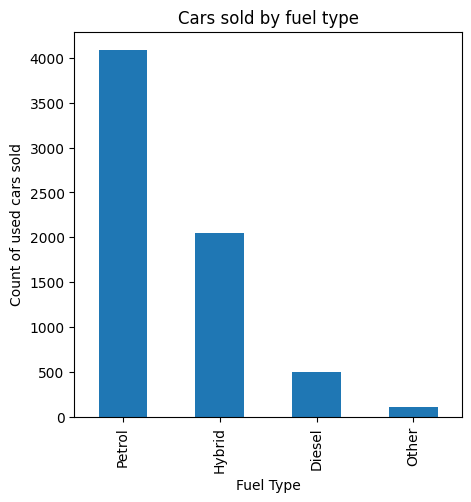

In [54]:
#Count of used cars sold by fuel type
plt.figure(figsize=(5,5))
df.groupby('fuelType')['fuelType'].count().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Count of used cars sold')
plt.xlabel('Fuel Type')
plt.title('Cars sold by fuel type')
plt.show()

En relación a las modelos de carros híbridos con mayores ventas, según el gráfico de barras a continuación, podemos establecer que los modelos más vendidos son Yaris, Auris y C-HR.

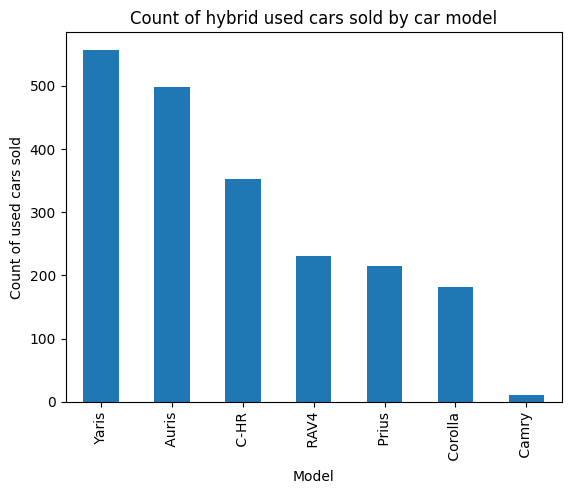

In [55]:
#Número de carros hibridos usados vendidos por tipo de combustible
df[df['fuelType'] == 'Hybrid'].groupby('model')['model'].count().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Count of used cars sold')
plt.xlabel('Model')
plt.title('Count of hybrid used cars sold by car model')
plt.show()

Al analizar la distribución de precios de los carros usados vendidos los últimos seis meses, se establece que la mayoría de los carros vendidos tienen un precio menor a 30000 GDP y en general, el valor de los carros usados vendidos con mayor frecuencia oscila los 10000 GDP. Los carros usados vendidos por un valor superior se consideran outliers.

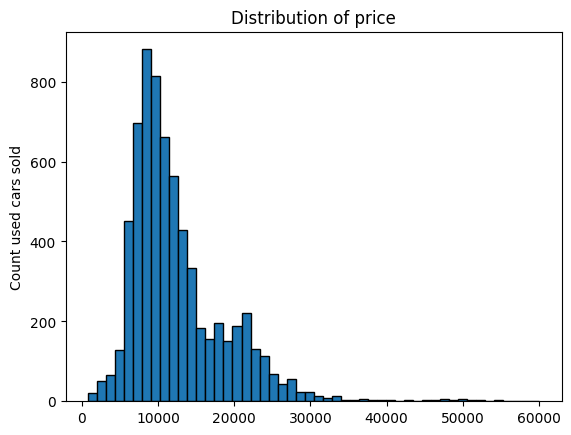

In [53]:
#Distribución de precio
df.price.plot(kind='hist', bins=50, edgecolor='black')
plt.title('Distribution of price')
plt.ylabel('Count of used cars sold')
plt.show()

Al comparar la distribución de precios de los vehiculos usados, según el gráfico de cajas a continuación, se puede establecer que con carros de tipo híbrido son en promedio los más costosos de los cuatro tipos de vehiculos ofertados por la compañía. Si se desea hacer este tipo de vehiculos más atrativos en el mercado se debe enfocar la estrateia de marketing en ganar parte del mercado ocupado por los carros a gasolina, que actualmente son los más vendidos por le empresa.

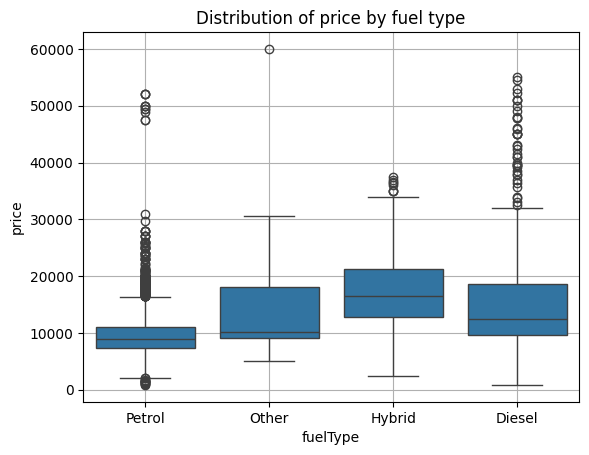

In [65]:
#Distribución de precios por tipo de combustible
sns.boxplot(data=df, x='fuelType', y='price')
plt.title('Distribution of price by fuel type')
plt.grid()
plt.show()

En este sentido, para competir con los carros a gasolina, se dede optar por posicionar los carros híbridos de menor valor o similar a aquellos que usan petróleo como combustible. La estrategia podría enfocarse en posicionar carros de los modelos Yaris, Auris y Pruis que tienen valores inferiores o cercanos a los 10000 GDP.

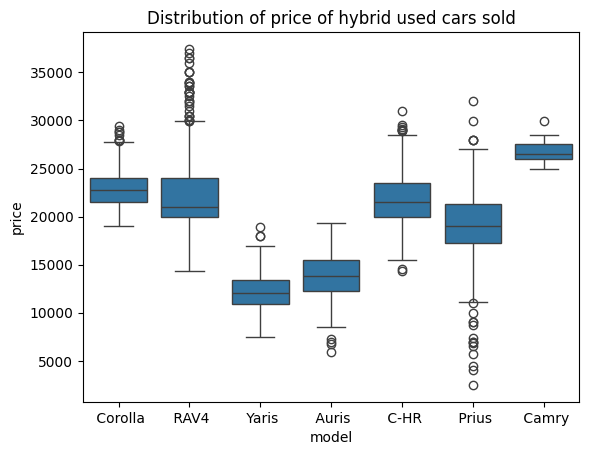

In [78]:
#Distribución de precios de carros híbridos por modelo
hybrid = df[df['fuelType']=='Hybrid']
sns.boxplot(data=hybrid, x='model',y='price')
plt.title('Distribution of price of hybrid used cars sold')
plt.show()

Por otro lado, se debe considerar el impuesto de circulación de los vehiculos. Según el gráfico de barras a continuación, el valor del impuesto más común para vehiculos a gasolina es de 145 GDP cuando aproximadamente el 50% de los vehiculos híbridos  no pagan impuesto de circulación o pagan un valor inferior al de los carros a gasolina.

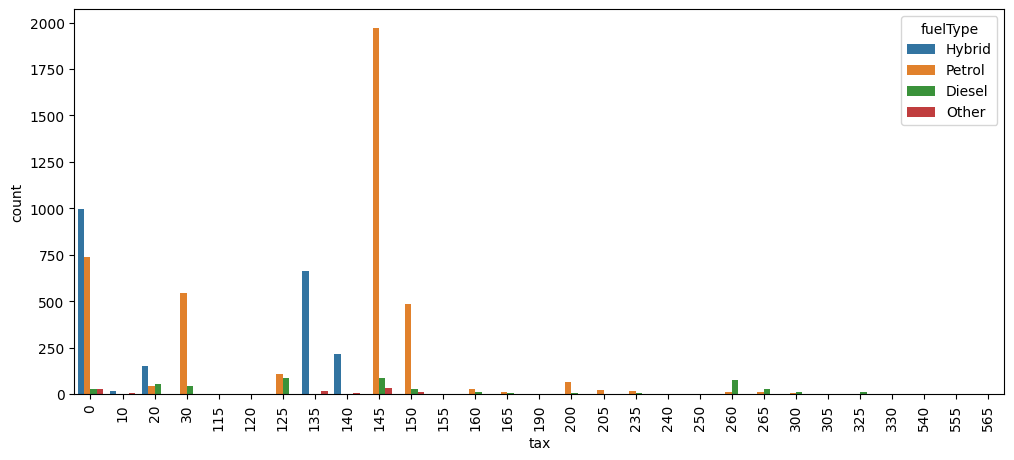

In [77]:
#Número de carros usados vendidos por impuesto de circulacón y tipo de combustible
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='tax', hue='fuelType')
plt.xticks(rotation=90)
plt.show()

### Métricas del negocio

Dado que el objetivo de la compañia es incrementar el número de carros híbridos o eléctricos usados vendidos, se recomienda evaluar la evolución del porcentaje de vehículos de estas categorías vendidos sobre el total. De esta manera, se tendrá claridad en la eficiencia o no de la campaña de marketing encargada de posicionar los vehículos híbridos o eléctricos en el mercado. De acuerdo a los datos proporcionados, el 30% de los vehículos usados vendidos los últimos seis meses son híbridos o eléctricos, en este sentido, un incremento en este valor seria un indicativos del exito de la campaña.

### Recomendaciones
Para las siguientes semanas se recomienda enfocar la operación en las siguientes acciones:

   - Mejorar la calidad de los datos, especificar a qué se refieren con 'otros tipo de combustible'.
   - Ampliar la cantidad de información recolectada durante las ventas para realizar un análisis de datos más exhaustivo. 
   - Implementar métricas para monitorear la evolución en las ventas de vehículos híbridos o eléctricos.
   - Preparar la campaña para el posicionamiento en el mercado de vehículos híbridos o eléctricos con precios similares al de vehículos tradicionales que usan gasolina como combustible, más especificamente los modelos Yaris, Auris y Prius.
   - Promover iniciativas para la reducción del impuesto de rodamiento de los vehículos híbridos. Establecer que factores intervienen para el establecimiento del impuesto para vehículos híbridos y basar la estrategia en la promoción de vehículos híbridos con menor impuesto.
   - Informar los beneficios económicos, medioambientales etc., del uso de carros híbridos o eléctricos.